In [1]:
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

from RSA.src.ipm import NeuronReader, grablabels

In [2]:
def hist_equalize(matrix):
    matrix = np.copy(matrix)
    shape = matrix.shape
    matrix = matrix.reshape(-1)
    index = matrix.argsort()
    values = np.linspace(0, 1, index.shape[0])
    matrix[index] = values
    return matrix.reshape(shape)

def mkrdm(data):
    rdmat = 1 - cosine_similarity(data)
    return hist_equalize(rdmat)
    # return rdmat

In [3]:
selectivity = "fast"
region = "it"
# it = False

data = NeuronReader(f'G:/Data/{selectivity}/Jenab/')
if region == "it":
    X = data.it    
else:
    X = data.pfc
    # time   = np.linspace(-175, 674, 850)
    # confusion = np.load('G:/Codes/Python/SVM/log/Ordination/pfc-mid-level.npy')
    # mid = np.trace(confusion, axis1=0, axis2=1) / confusion.sum((0, 1))
    # confusion = np.load('G:/Codes/Python/SVM/log/Ordination/pfc-super-ordinate.npy')
    # sup = np.trace(confusion, axis1=0, axis2=1) / confusion.sum((0, 1))

    
confusion = np.load(f'G:/Codes/Python/SVM/log/Ordination-{selectivity}/{region}-mid-level.npy')
mid = np.trace(confusion, axis1=0, axis2=1) / confusion.sum((0, 1))
confusion = np.load(f'G:/Codes/Python/SVM/log/Ordination-{selectivity}/{region}-super-ordinate.npy')
sup = np.trace(confusion, axis1=0, axis2=1) / confusion.sum((0, 1))
    
mid_si = np.load(f'G:/Codes/Python/Separability/log/selective-true-selectivity-{selectivity}-nboot-200-equalize-true-pca-30/{region}-mid-level.npy')
sup_si = np.load(f'G:/Codes/Python/Separability/log/selective-true-selectivity-{selectivity}-nboot-200-equalize-true-pca-30/{region}-super-ordinate.npy')

y = grablabels(hierarchy='categories')
img_index = np.arange(1, y.size+1)[np.argwhere(~np.isnan(y)).squeeze()]
X = X[np.argwhere(~np.isnan(y)).squeeze()]
y = y[np.argwhere(~np.isnan(y)).squeeze()]
yc = np.full(y.size, 'x')
yc[y==0] = 'af'
yc[y==1] = 'hf'
yc[y==2] = 'mf'
yc[y==3] = 'hb'
yc[y==4] = 'mb'
yc[y==5] = 'ab'
yc[y==5] = 'xn'
yc[y==6] = 'xa'

argsort = np.argsort(y)
rdmat = np.nan * np.ones([argsort.size, argsort.size, X.shape[2]])

for itime in range(X.shape[2]):
    rdmat[:,:,itime] = mkrdm(X[argsort, :, itime])

In [13]:
data.time[255]
data.time[288]

113.0

In [14]:
X1 = rdmat[:,:,255]
X2 = rdmat[:,:,288]
Xm = rdmat[:,:,271]

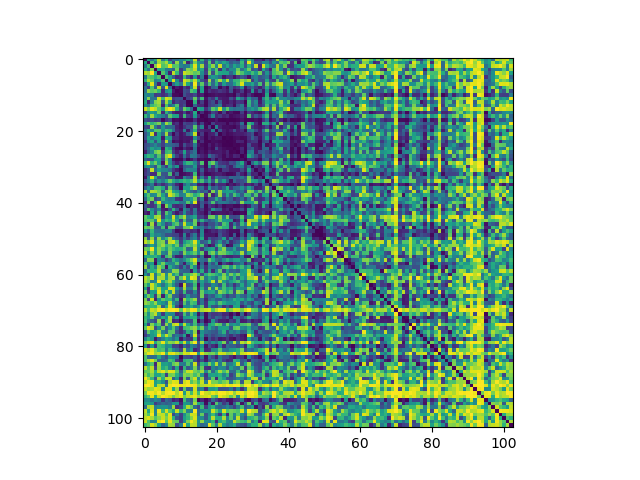

In [19]:
plt.imshow(X1)

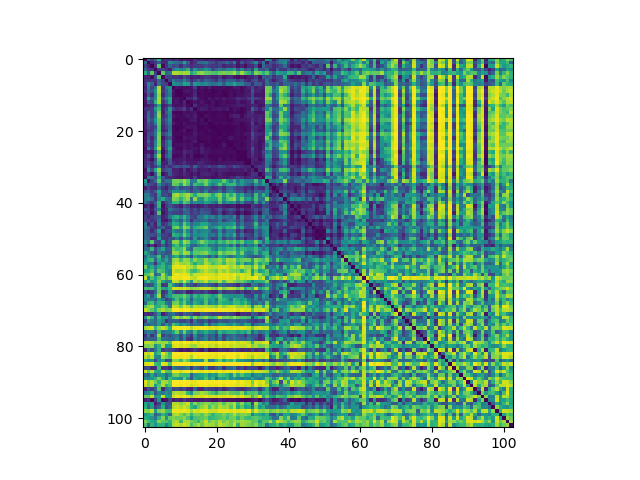

In [20]:
plt.figure()
plt.imshow(X2)

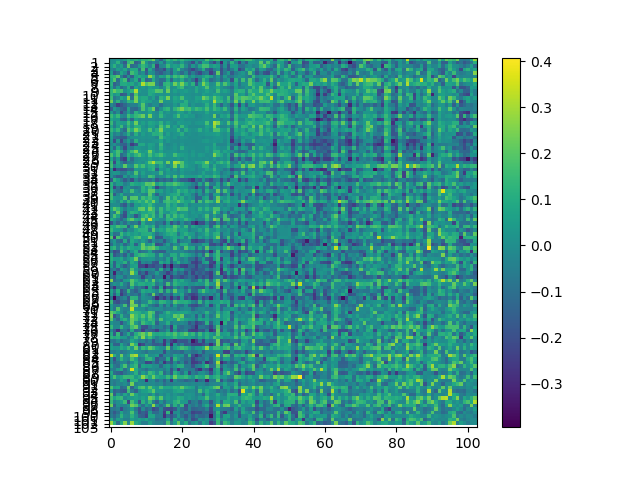

In [26]:
plt.figure()
plt.imshow((X1+X2)/2 - Xm)
plt.yticks(np.arange(1, rdmat.shape[0]+1, 1))

plt.colorbar()

In [4]:
%matplotlib widget

In [13]:
from ipywidgets import interact, widgets, AppLayout
# import matplotlib.pyplot as plt
# import warnings

def f(change):
    tim = change['new'] + 175
    ax1.set_title(tim)
    im.set_data(rdmat[:, :, tim])
    l1[0].set_data(data.time[:tim], mid[:tim].mean(1))
    l2[0].set_data(data.time[:tim], sup[:tim].mean(1))
    l3[0].set_data(data.time[:tim], mid_si[:tim].mean(1))
    l4[0].set_data(data.time[:tim], sup_si[:tim].mean(1))
    # ax2.plot(time[:tim], mid[:tim].mean(1))
    # ax2.plot(time[:tim], mid_si[:tim].mean(1))
    # ax2.plot(time[:tim], mid[:tim].mean(1))
    fig.canvas.draw()
    fig.canvas.flush_events()

plt.ioff()
fig = plt.figure(figsize=(12, 5))
fig.canvas.header_visible = False
# plt.ion()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(224)
ax2.set_xlim(-175, 674)
ax3.set_xlim(-175, 674)
ax2.set_ylim(.4, 1)

ax2.plot(data.time, mid.mean(1), lw=3, c='gray', alpha=.1)
ax2.plot(data.time, sup.mean(1), lw=4, c='gray', alpha=.1)
ax3.plot(data.time, mid_si.mean(1), lw=3, c='gray', alpha=.1)
ax3.plot(data.time, sup_si.mean(1), lw=3, c='gray', alpha=.1)
ax2.set_title('SVM Classifier')
ax3.set_title('Separability Index')
ax1.set_yticks(np.arange(1, rdmat.shape[0]+1, 1))
ax1.set_xticks([])
ax2.set_xticks([])

im = ax1.imshow(rdmat[:,:,0], cmap="copper")
l1 = ax2.plot(data.time[:0], mid[:0].mean(1), c='royalblue', lw=3)
l2 = ax2.plot(data.time[:0], sup[:0].mean(1), c='orangered', lw=3)
l3 = ax3.plot(data.time[:0], sup_si[:0].mean(1), c='royalblue', lw=3)
l4 = ax3.plot(data.time[:0], sup_si[:0].mean(1), c='orangered', lw=3)
slider = widgets.IntSlider(min=-175,max=674,step=1,value=1)
slider.observe(f, names='value')

al = AppLayout(
    center=fig.canvas,
    footer=slider,
    pane_heights=[0, 6, 1]
)
display(al)
# interact(f, tim=widgets.IntSlider(min=-175,max=674,step=1,value=1)) 

AppLayout(children=(IntSlider(value=1, layout=Layout(grid_area='footer'), max=674, min=-175), Canvas(header_vi…